In [1]:
# Created By: Priyansh Kumar Nigam

# The following notebook file is used to create a deep neural network model to identify whether a given image
# is of a Dog or a Cat

# The training and testing data can be downloaded from https://www.kaggle.com/datasets/arpitjain007/dog-vs-cat-fastai
# All Cat images were added in a folder titled "Cats", Similarly All Dog images were added in a folder titled "Dogs"
# Total Number of Cat images: 12,493
# Total Number of Dog images: 12,501

# Importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
import random

In [4]:
loc = os.getcwd()
categories = ['Cat', 'Dog']

In [5]:
# adding images and (0 => cats or 1 => dogs) in the list titled "data"
# adding images using cv2 and resizing images to grid size of 100 X 100

data = []
ct = 0
for pet in categories:
    p = os.path.join(loc, pet)
    pet_ind = categories.index(pet)
    for img in os.listdir(p):
        try:
            arr_img = cv2.imread(os.path.join(p, img))
            arr_img = cv2.resize(arr_img, (100,100))
            data.append([arr_img , pet_ind])
        except Exception as e:
            pass 

In [6]:
# length of list containing all images

len(data)

24946

In [7]:
# Shuffling the data

random.shuffle(data)

In [10]:
# storing images and labels in arrays x and y respectively from the shuffled data

x = []
y = []
for arr, label in data:
    x.append(arr)
    y.append(label)

In [11]:
x = np.array(x)
y = np.array(y)

# Images are stored in the form of a matrix of numbers in a computer where these numbers are known as pixel values. 
# These pixel values represent the intensity of each pixel. 0 represents black and 255 represents white.

x=x/255

In [12]:
# x consists of all the images in the matrix form

x.shape

(24946, 100, 100, 3)

In [13]:
# Building model

from keras.models import Sequential

In [14]:
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten

In [21]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128, input_shape=x.shape[1:], activation = 'relu'))

model.add(Dense(128, input_shape=x.shape[1:], activation = 'relu'))

model.add(Dense(2, activation = 'softmax'))

In [22]:
# compiling the model

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [23]:
# training the model

model.fit(x, y, epochs = 5, validation_split=0.1)

Epoch 1/5
702/702 [==============================] - 1831s 2s/step - loss: 0.7026 - accuracy: 0.6195 - val_loss: 0.4935 - val_accuracy: 0.7639
Epoch 2/5
702/702 [==============================] - 1433s 2s/step - loss: 0.4735 - accuracy: 0.7714 - val_loss: 0.4490 - val_accuracy: 0.7860
Epoch 3/5
702/702 [==============================] - 1427s 2s/step - loss: 0.4025 - accuracy: 0.8164 - val_loss: 0.4201 - val_accuracy: 0.8040
Epoch 4/5
702/702 [==============================] - 1432s 2s/step - loss: 0.3243 - accuracy: 0.8598 - val_loss: 0.4239 - val_accuracy: 0.8120
Epoch 5/5
702/702 [==============================] - 1433s 2s/step - loss: 0.2480 - accuracy: 0.8961 - val_loss: 0.4469 - val_accuracy: 0.8088


In [24]:
# Analyzing the model parameters like loss, accuracy, validation loss etc by loading its training history 
# in a pandas dataframe

loss_df = pd.DataFrame(model.history.history)

In [25]:
loss_df_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.593629,0.683488,0.493545,0.763928
1,0.465007,0.777426,0.448967,0.785972
2,0.393830,0.821077,0.420100,0.804008
3,0.327149,0.857779,0.423916,0.812024
4,0.250054,0.894526,0.446865,0.808818


In [26]:
# Plotting loss and vaidation loss to better understand the model and see whether overfitting or underfitting is present
# or not

loss_curve = loss_df.drop(['accuracy', 'val_accuracy'], axis = 1)
loss_curve.head()

,loss,val_loss
0,0.593629,0.493545
1,0.465007,0.448967
2,0.393830,0.420100
3,0.327149,0.423916
4,0.250054,0.446865


<AxesSubplot:>

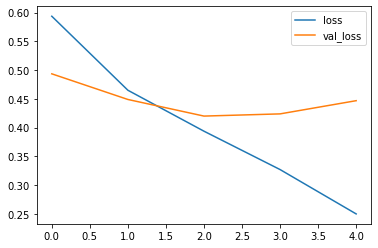

In [27]:
loss_curve.plot()

<AxesSubplot:>

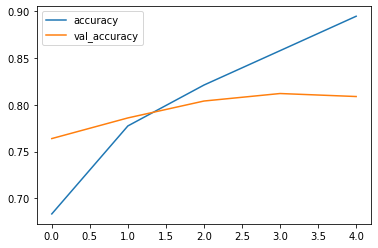

In [28]:
loss_curve2 = loss_df.drop(['loss', 'val_loss'], axis = 1)
loss_curve2.plot()

In [70]:
# testing the model on sample images taken from internet

# The model will return 0 => Cat and 1 => Dog

# Adding location of test image

timg = os.path.join(loc, 'd21.jpg')

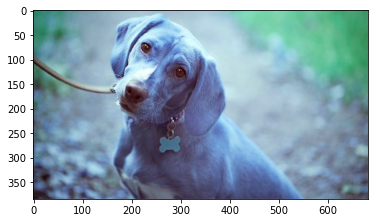

In [72]:
# Adding image in readable form using cv2

timgr = cv2.imread(timg)
plt.imshow(timgr)

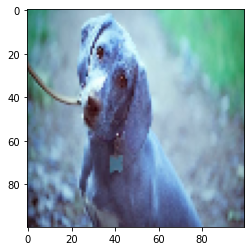

In [73]:
# Converting image to 100 X 100 grid size, since we converted all our sample data to the same form

timgr = cv2.resize(timgr, (100,100))
plt.imshow(timgr)

In [74]:
# adding this image in a numpy array to input in our model and also dividing its parameters by 255 to have values 
# in the range of 0 to 1

l = []
l.append(timgr)

In [75]:
l = np.array(l)
l = l/255

In [76]:
l.shape

(1, 100, 100, 3)

In [79]:
# passing the sample image in the trained model

pr = model.predict_classes(l)

C:\Users\Priyansh\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [80]:
# Verifying model output, which is 1 that is prediction is correct

pr

array([1], dtype=int64)

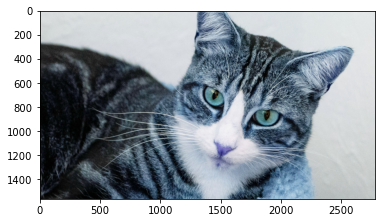

In [81]:
# Similarly, checking model performance with other images taken from the internet 

timg = os.path.join(loc, 'c1.jpg')
timgr = cv2.imread(timg)
plt.imshow(timgr)

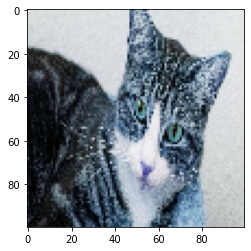

In [82]:
timgr = cv2.resize(timgr, (100,100))
plt.imshow(timgr)

In [83]:
l = []
l.append(timgr)
l = np.array(l)
l = l/255
pr = model.predict_classes(l)
pr

array([0], dtype=int64)

In [ ]:
# The prediction of our model is correct for the above case

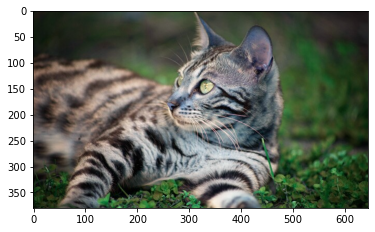

In [84]:
timg = os.path.join(loc, 'download.jpg')
timgr = cv2.imread(timg)
plt.imshow(timgr)

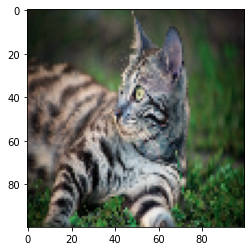

In [85]:
timgr = cv2.resize(timgr, (100,100))
plt.imshow(timgr)

In [86]:
l = []
l.append(timgr)
l = np.array(l)
l = l/255
pr = model.predict_classes(l)
pr

array([0], dtype=int64)

In [ ]:
# The prediction of our model is correct for the above case

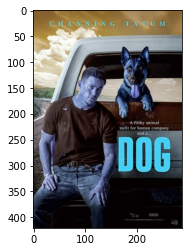

In [87]:
timg = os.path.join(loc, 'dw1.jpg')
timgr = cv2.imread(timg)
plt.imshow(timgr)

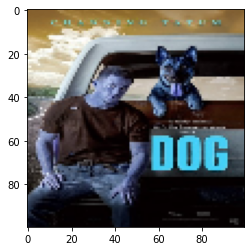

In [88]:
timgr = cv2.resize(timgr, (100,100))
plt.imshow(timgr)

In [89]:
l = []
l.append(timgr)
l = np.array(l)
l = l/255
pr = model.predict_classes(l)
pr

array([1], dtype=int64)

In [ ]:
# The prediction of our model is correct for the above case

In [ ]:
daa.jpg

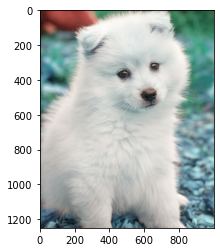

In [90]:
timg = os.path.join(loc, 'daa.jpg')
timgr = cv2.imread(timg)
plt.imshow(timgr)

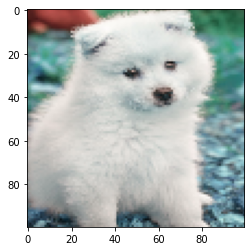

In [91]:
timgr = cv2.resize(timgr, (100,100))
plt.imshow(timgr)

In [92]:
l = []
l.append(timgr)
l = np.array(l)
l = l/255
pr = model.predict_classes(l)
pr

array([1], dtype=int64)

In [ ]:
# The prediction of our model is correct for the above case

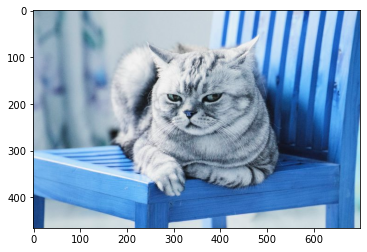

In [96]:
timg = os.path.join(loc, 'c3.jpg')
timgr = cv2.imread(timg)
plt.imshow(timgr)

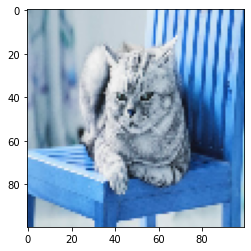

In [97]:
timgr = cv2.resize(timgr, (100,100))
plt.imshow(timgr)

In [98]:
l = []
l.append(timgr)
l = np.array(l)
l = l/255
pr = model.predict_classes(l)
pr

array([0], dtype=int64)

In [ ]:
# The prediction of our model is correct for the above case

In [100]:
# Saving the model for future needs

model.save('models/cats_vs_dogs_1.h5')

In [ ]:
# Thank You